In [ ]:
#hide
from wtlike import *
from utilities.ipynb_docgen import *
# if Config().valid:
#     from utilities.ipynb_docgen import *
#     plt.rc('font', size=14)
#     plt.rc('savefig', pad_inches=0.2)

#     from wtlike.data_man import update_data
#     with Timer() as t:
#         clear = update_data()
#         print('Update data', t)
#     check_data();
#     # clear=False

# Presentation to the Fermi Collaboration

>Prepared for presentation to the Fermi-LAT Autumn 2011 collaboration meeting, to follow a time-based weighted likelihood presentation by M. Kerr.

## Introduction to wtlike
The `wtlike` package applies the 
[Kerr weighted likelihood](https://arxiv.org/pdf/1910.00140.pdf) to *Fermi* photon data. It is available on [PyPI](https://pypi.org/project/wtlike/) and [github](https://github.com/tburnett/wtlike), is purely in python with no dependency on Fermi-LAT code.

I'd like to express appreciation to Kent Wood, for being a tester and providing many useful suggestions. 

#### Quickly generate light curves 
Within 10 min, one can generate the full light curve for any source on any time scale, optionaly performing a Bayesian Block analysis.

Thus, as shown here, one can:
* Extend the Light Curve Repository


Other Potential applications
* Reproduce the entire LCR
* Evaluate variability for all sources with Bayesian Blocks
* Periodically monitor a set of sources for recent flaring activity
* Detect and make light curves of unassociated flares from FAVA
* with timing solutions, provide lists of weighted photons for pulsar timing

I now demonstrate how to reproduce and extend any source in the Light Curve Repository (LCR)

In [ ]:
# collapse-hide
@ipynb_doc
def lcr_about():
    """
    ## The Light Curve Repository "about" example

    I'll use this strong, active source as an example for a simple comparison.
    Here is the 4FGL source 4FGL J0237.8+2848 (associated with 4C 28.07), as shown on the [LCR "about" page](https://fermi.gsfc.nasa.gov/ssc/data/access/lat/LightCurveRepository/about.html)

    {img}

    This shows 3-day bins through Sep 28 2020. 
    """
    img=image('LCR_about_fig2.png', caption=None, width=600)
    
    return locals()

lcr_about()

## The Light Curve Repository "about" example

I'll use this strong, active source as an example for a simple comparison.
Here is the 4FGL source 4FGL J0237.8+2848 (associated with 4C 28.07), as shown on the [LCR "about" page](https://fermi.gsfc.nasa.gov/ssc/data/access/lat/LightCurveRepository/about.html)

<figure style="margin-left: 5%" title="Figure 1">  <a href="images/lcr_about_fig_01.png" title="images/lcr_about_fig_01.png">    <img src="images/lcr_about_fig_01.png" alt="Figure 1 at images/lcr_about_fig_01.png" width=600>   </a> </figure>

This shows 3-day bins through Sep 28 2020. 


## The same source with wtlike
<p style="text-align:right; ">wtlike version 0.5.6<br>2022-07-03 08:38</p>

### The result
<figure style="margin-left: 5%" title="Figure 1">   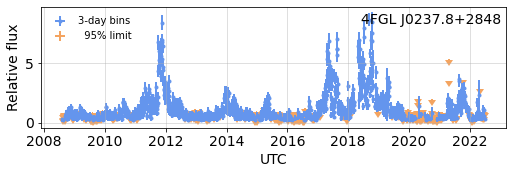 </figure>

What did that take?
#### Set up the source ...

The only code, perhaps in a Jupyterlab cell, needed to set up the source for plots is: 

```
    from wtlike import *
    wtl = WtLike('4FGL J0237.8+2848', time_bins=(0,0,3))
```  
<br>
<details  class="nbdoc-description" >  <summary> Source setup output: Load data, create and fit bins </summary>  <div style="margin-left: 5%;"><pre>SourceData:  4FGL J0237.8+2848: Saving to cache with key "P88Y0643_data"<br>	Processing 726 week files week_009.pkl - week_735.pkl , using 4 processes <br><br>SourceData: Source 4FGL J0237.8+2848 with:<br>	 data:       129,845 photons from 2008-08-04 to 2022-07-02<br>	 exposure: 3,382,996 intervals,  average effective area 2943 cm^2 for 101.2 Ms<br>	 rates:  source 1.21e-07/s, background 3.15e-07/s, TS 43807.3<br>CellData.rebin: Bin photon data into 1693 3-day bins from 54683.0 to 59762.0<br>LightCurve: select 1639 cells for fitting with e&gt;15 & n&gt;2<br>elapsed time: 245.0s (4.1 min)<br></pre></div> </details>

This creates an instance, `wtl`, of the class `WtLike`, specifying a source name, with 3-day (default is 7) time bins for the full data set.
The name can be that of any source known to `astropy` which is closer than $0.1^\circ$ to a 4FGL-DR3 or uw1216 source.
Thus specifying instead the associated 4C 28.07 would have worked.
#### ... and make the plot
Then, instructing the object to plot itself with the statement

```
    wtl.plot()
```

generates the light curve plot shown above. 
  
### Apply Bayesian blocks 
To partion the 3-day intervals, or cells, using Bayesian Blocks use another function member of the class `WtLike`. The 
statements 

```
    bb = wtl.bb_view()
    bb.plot()
```
<br>
define a new *instance* of `WtLike`, using the current 3-day likelihood fits.
This instance has a different `plot()`, which makes an overlay showing the BB partitions, each with a new fit. 
<details  class="nbdoc-description" >  <summary> Bayesian block analysis output </summary>  <div style="margin-left: 5%;"><pre>Bayesian Blocks: partitioning 1639 cells using LikelihoodFitness with penalty 5%<br>	found 80 / 1639 blocks.<br>LightCurve: Loaded 80 / 80 cells for fitting<br>elapsed time: 29.0s (0.5 min)<br></pre></div> </details>
<figure style="margin-left: 5%" title="Figure 2">   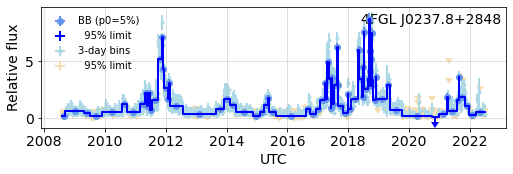 </figure>

### Check that recent flare
The flaring behavior at the end of the interval prompts exploration. We use the `view()` function to return another 
copy of the original `wtl`, but with different binning, and ask it to make a plot of the last 30 days, via

```
    recent = wtl.view(-30,0,1)
    recent.plot()
```
<br>
<details  class="nbdoc-description" >  <summary> Rebinning output </summary>  <div style="margin-left: 5%;"><pre>CellData.rebin: Bin photon data into 30 1-day bins from 59732.0 to 59762.0<br>LightCurve: select 30 cells for fitting with e&gt;5 & n&gt;2<br></pre></div> </details>
<figure style="margin-left: 5%" title="Figure 3">   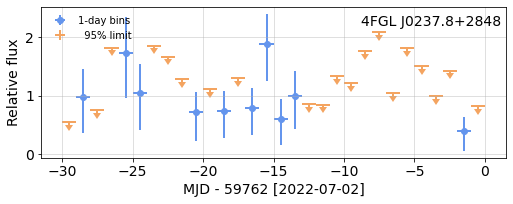 </figure>


In [ ]:
# collapse-hide
@ipynb_doc
def lcr_about_example(fig_width=600, clear=False):
    """
    ## The same source with wtlike
    <p style="text-align:right; ">wtlike version {__version__}<br>{date}</p>
    
    ### The result
    {fig1}
    
    What did that take?
    #### Set up the source ...
    
    The only code, perhaps in a Jupyterlab cell, needed to set up the source for plots is: 

    ```
        from wtlike import *
        wtl = WtLike('4FGL J0237.8+2848', time_bins=(0,0,3))
    ```  
    <br>
    {print1}
    
    This creates an instance, `wtl`, of the class `WtLike`, specifying a source name, with 3-day (default is 7) time bins for the full data set.
    The name can be that of any source known to `astropy` which is closer than $0.1^\circ$ to a 4FGL-DR3 or uw1216 source.
    Thus specifying instead the associated 4C 28.07 would have worked.
    #### ... and make the plot
    Then, instructing the object to plot itself with the statement
    
    ```
        wtl.plot()
    ```
    
    generates the light curve plot shown above. 
      
    ### Apply Bayesian blocks 
    To partion the 3-day intervals, or cells, using Bayesian Blocks use another function member of the class `WtLike`. The 
    statements 
    
    ```
        bb = wtl.bb_view()
        bb.plot()
    ```
    <br>
    define a new *instance* of `WtLike`, using the current 3-day likelihood fits.
    This instance has a different `plot()`, which makes an overlay showing the BB partitions, each with a new fit. 
    {print2}
    {fig2}
    
    ### Check that recent flare
    The flaring behavior at the end of the interval prompts exploration. We use the `view()` function to return another 
    copy of the original `wtl`, but with different binning, and ask it to make a plot of the last 30 days, via
    
    ```
        recent = wtl.view(-30,0,1)
        recent.plot()
    ```
    <br>
    {print3}
    {fig3}
    
    """
    from wtlike import __version__
    with capture('Source setup output: Load data, create and fit bins') as print1:
        with Timer() as t:
            wtl = WtLike('4FGL J0237.8+2848', time_bins=(0,0,3), clear=clear)
        print(t)
    fig1 = figure(
        wtl.plot(UTC=True,figsize=(15,4), fignum=1),
        width=fig_width)
    
    with capture('Bayesian block analysis output', ) as print2:
        with Timer() as t:
            bb = wtl.bb_view()
        print(t)
    fig2= figure(bb.plot(UTC=True,figsize=(15,4), fignum=2), width=fig_width);
    
    with capture('Rebinning output') as print3:
        recent = wtl.view(-30,0,1)
    
    fig3=figure(recent.plot(tzero=round(wtl.stop), fignum=3), width=fig_width)
    print(' ')  # seems needed to get nbdev to generate the doc?  
    return locals()
    
if Config().valid:
    lcr_about_example()
        

#### So what do you need in order to do this?
* Install with `pip install wtlike`
* create a file `~/.config/wtlike/config.yaml` like the one at `/nfs/farm/g/glast/burnett`
* Make a link to, or get a copy of the 3 GB at `/nfs/farm/g/glast/u/burnett/wtlike_data` 

In [ ]:
# collapse-hide
@ipynb_doc
def show_dataflow():
    """
    ### How does it work?
    #### Data flow diagram
    {img}
    """
    img = image('wtlike_dataflow.png', width=600, caption=None)
    return locals()
show_dataflow()

Docstring formatting failed: 'NBimage' object has no attribute 'get_size_inches'

There are some important features

*  Weights assigned via a table  <br>
Allows sepation of the procesees that evaluates the weight from assignment to an individual photon. 

* Photons and livetime info for any direction are taken from a compact version of the full FT1/FT2 set of files.<br>
This makes the system very portable, with <3GB needed, with no need for the full `fermipy` package, and much faster to start a source, and especially to generate a new binning.
    

* Using a Poisson-like representation of the likelihood.<br>
It turns out that any likelihood evaluated with the Kerr formula, involving a lot of computation, can be safely approximated with a 3-parameter scaled Poisson function.<br> 
Thus the fits to individual cells are represented by the *likelihood function*, not just a limit or a 
value/uncertainty pair--these easily derived from the three parameters!

* Exposure is calculated based on the energy and event type, rather than assuming a power-law.<br>
For count flux measurements, which are dominated by the lowest energies, this does not matter much, but it allows measurement of energy dependence, a future enhancement.


### The user interface
`wtlike` is designed for, (but does not require) Jupyterlab notebooks, that is, to enhance interactivity. As this presentation 
shows, a basic light curve, can be done with a single line of code: 
```
WtLike('4C 28.07').plot()
```
If the source in 
question is already in the cache managed by wtlike, this requires <10s, otherwise ~10 min. Creating different *views*, with restricted time ranges or intervals, is simply done with the `view()` member function. Running a Bayesian Block analysis is performed with the function `bb_view()`. 

## Caveats and (Current) Limitations


### Problem with the exposure calculation?
Kent finds, using autocorrelation, a significant precession period (~52 day) signal in some parts of the sky, especially the GC. This needs to be understood and corrected immediately. It does not seem to affect Geminga, with only a 4% systematic resolution degradation, or any of the pulsars that I have studied, however.

### Pointlike rather than gtlike
The weights tables should be similar, but gtlike is the collaboration standard.

### Absolute fluxes
The weighted likelihood provides *relative* count flux values vs. time, relative to the average flux for the full time interval. However, the weights were determined by the 12-year DR3 dataset.

### Nearby variable sources

As pointed out in the  [LCR "about" page](https://fermi.gsfc.nasa.gov/ssc/data/access/lat/LightCurveRepository/about.html),
there are "15 other variable sources within a 12 deg radius". But in the case shown, the nearest variable source is $4.8^\circ $ away. A weak pulsar $4^\circ$ distant shows no effect.
Actually, another source has to be within a few degrees to have an impact. The Kerr scheme assumes that the background is constant, at most allowing for an overall rescaling which would not describe the effect of a nearby source. 

However, given the position-dependent weight tables for both sources, each initally determined assuming the other is constant, allows a straight-forward modification for overlapping pixels. The dominant case, that
only one is varying at a time is easy. This a future project.

### GRBs and solar flares
Could be locally masked out. 


### Data file availability
The 3 GB that are needed (which compress to a 2 GB zip file) need to have a publicly available place for distribution. Fermi collaboarators who have a SLAC account could access them via scp (they are at /afs/slac/g/glast/users/burnett/wtlike_data), but I want a public repository, ideally with a cron job to perform daily updates of the photon data.

### The biggest limitation
<details>
    <summary> is ... </summary>   
     <p style="text-align:center; font-size:24px; color:red;">There is only one (octogenarian) developer!</p>
    
</details>

<br>

All the code is in [github/tburnett/wtlike](https://github.com/tburnett/wtlike), somewhat documented using the nbdev system.
